##Combine all data files into dataframes

In [716]:
import pickle
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt

In [717]:
datafiles = ['boxofficedata.pkl','franchiseBrands.pkl','franchiseSeries.pkl','screens.pkl','bestpicture.pkl','bestdirector.pkl','bestactor.pkl','bestactress.pkl','director.pkl','cast.pkl','runtime.pkl', 'genre.pkl', 'budget.pkl', 'budget2.pkl']
datasets = []
for datafile in datafiles:
     with open(datafile, 'r') as picklefile: 
            datafile = pickle.load(picklefile)
            datasets.append(datafile)

####Self-Defined Functions

In [718]:
import re
def cleanNumber(moneystring):
    if moneystring == 'N/A' or moneystring == 'NA' or not moneystring:
        return None
    else:
        moneystring = str(moneystring)
        moneystring = re.sub("[^0-9]", "", moneystring)
        return np.int_(moneystring)

In [719]:
def cleanMillion(value):
    if value is None or value == 'NA' or value == 'N/A':
        return None
    elif value is not None and not 'million' in value:
        value = str(value)
        value = re.sub("[^0-9|^\.]", "", value)
        value = np.int_(float(value))
        return value
    else:
        value = str(value)
        value = re.sub("[^0-9|^\.]", "", value)
        value = np.int_(float(value)*1000000)
        return value

In [720]:
def stateColnames(dataframe=None, beginning=None):
    '''This function takes in a dataframe and create an indexed list of column names'''
    colnames = []
    for i in range(dataframe.shape[1]):
        name = beginning + str(i)
        colnames.append(name)
    return colnames

In [721]:
def cleanNames(dinput=None):
    nlist = []
    for item in cast:
        if item == 'N/A' or item == 'NA':
            nlist.append([])
        else:
            nlist.append(item)
    newcast = pd.DataFrame(data=nlist)
    return newcast

In [722]:
def compareLists(input1=None, input2=None):
    matched = []
    notmatched = []
    for item in input1:
        if item in input2:
            matched.append(item)
        elif item not in input2:
            notmatched.append(item)
    return matched, notmatched

In [723]:
def cleanValues(dictionary=None):
    '''This function cleans up the dictionary values (e.g. changing N/A into [N/A])'''
    newruntime = defaultdict()
    for key in dictionary.keys():
        if dictionary[key] == 'N/A':
            newruntime[key] = ['N/A']
        else:
            newruntime[key] = dictionary[key]
    return newruntime

####Read in boxoffice and screens data

In [724]:
datafiles.index('boxofficedata.pkl'), datafiles.index('screens.pkl'), datafiles.index('director.pkl')

(0, 3, 8)

In [725]:
boxoffice = pd.DataFrame.from_dict(data = datasets[0], orient='index', dtype=None)
boxoffice.columns = ['Studio', 'BoxOfficeGross', 'ReleaseDate']

In [726]:
boxoffice['BoxOfficeGross'] = boxoffice['BoxOfficeGross'].apply(cleanNumber)

In [727]:
boxoffice.shape

(1520, 3)

In [728]:
screens = pd.DataFrame.from_dict(data = datasets[3], orient='index', dtype=None)
screens.columns = ['Screens']
screens['Screens'] = screens['Screens'].apply(cleanNumber)

In [729]:
screens.shape

(1520, 1)

####Read in movie genre information

In [730]:
datafiles.index('genre.pkl')

11

In [731]:
genredict =  datasets[11]
newgenre = cleanValues(dictionary=genredict)
genre = pd.DataFrame.from_dict(data = newgenre, orient='index', dtype=None)
genre.columns = stateColnames(dataframe=genre, beginning='Genre')
print genre.shape

(1520, 7)


#### Read in budget data

In [732]:
datafiles.index('budget.pkl')

12

In [733]:
budgetdict =  datasets[12]
newbudget = defaultdict()
for key in budgetdict.keys():
    if budgetdict[key] == 'N/A':
        newbudget[key] = [None]
    else:
        newbudget[key] = [budgetdict[key]]
budget = pd.DataFrame.from_dict(data = newbudget, orient='index', dtype=None)
budget.columns = ['Budget']
budget['Budget']= budget['Budget'].apply(cleanMillion)

In [734]:
budget['Budget'].fillna(-1)
budget = budget[budget['Budget'] > 0]
print len(budget.index)
print budget.head(5)

678
                        Budget
Vampires Suck         20000000
Life of Pi           120000000
The Crazies           20000000
No Good Deed (2014)   13200000
Lockout               20000000


#####Getting budget information from the numbers website

In [735]:
datafiles.index('budget2.pkl')

13

In [736]:
budgetdict2 =  datasets[13]
list1 = budgetdict2.keys()
list2 = budget.index

In [737]:
matched, notmatched = compareLists(input1=list1, input2=list2)
print len(matched), len(list2), len(list1), len(boxoffice.index)

541 678 4792 1520


####Read in runtime data

In [738]:
runtimedict = datasets[10]

In [742]:
newruntime = cleanValues(dictionary=runtimedict)   
runtime = pd.DataFrame.from_dict(data = newruntime, orient='index', dtype=None)
runtime.columns = ['Runtime1', 'Runtime2', 'Runtime3', 'Runtime4']
runtime['Runtime1'] = runtime['Runtime1'].apply(cleanNumber)
runtime['Runtime2'] = runtime['Runtime2'].apply(cleanNumber)
runtime['Runtime3'] = runtime['Runtime3'].apply(cleanNumber)
print runtime.shape

(1520, 4)


####Read in and transforming franchise information

In [743]:
datafiles.index('franchiseBrands.pkl')

1

In [744]:
franchiseBrandsdict = datasets[1]
brands = {}
for key, value in franchiseBrandsdict.iteritems():
    for item in value:
        brands[item] = brands.get(item, [])
        brands[item].append(key)

In [745]:
franchiseBrands = pd.DataFrame.from_dict(data = brands, orient='index', dtype=None)
franchiseBrands.columns = stateColnames(dataframe=franchiseBrands, beginning='Brand')

In [746]:
franchiseSeries = datasets[2]
series = {}
for key, value in franchiseSeries.iteritems():
    for item in value:
        series[item] = series.get(item, [])
        series[item].append(key)

In [747]:
franchiseSeries = pd.DataFrame.from_dict(data = series, orient='index', dtype=None)
franchiseSeries.columns = stateColnames(dataframe=franchiseSeries, beginning='Series')

In [748]:
franchise = pd.concat([franchiseBrands, franchiseSeries], axis = 1, join='outer')
franchise = franchise.fillna('None')

####Read in and transform oscars data

In [749]:
datafiles.index('bestdirector.pkl'), datafiles.index('bestactor.pkl'), datafiles.index('bestactress.pkl')

(5, 6, 7)

In [750]:
bestDirectorDict = datasets[5]
OscarNomDirectors = []
for directors in bestDirectorDict.values():
    for person in directors:
        if person not in OscarNomDirectors:
            OscarNomDirectors.append(person)

In [751]:
bestActorDict = datasets[6]
OscarNomActors = []
for actors in bestActorDict.values():
    for actor in actors:
        if actor not in OscarNomActors:
            OscarNomActors.append(actor)

In [752]:
bestActressDict = datasets[7]
OscarNomActress = []
for actresses in bestActressDict.values():
    for actress in actresses:
        if actress not in OscarNomActress:
            OscarNomActress.append(actress)

In [753]:
OscarNomActors.extend(OscarNomActress)

Oscars Nominations and actors

In [754]:
castdict = datasets[9]
def getAllActors(adict = castdict):
    allactors = []
    for values in castdict.values():
        for item in values:
            allactors.append(item)
    allactors = list(set(allactors))
    return allactors
allactors = getAllActors()
len(allactors)

54382

In [755]:
matched, notmatched = compareLists(input1=allactors, input2=OscarNomActors)
print len(matched), len(notmatched)

91 54291


In [756]:
from difflib import SequenceMatcher
def fuzzyMatchRatios(list1=notmatched, list2=OscarNomActors):
    namepairs = {}
    for items in list1:
        for things in list2:
            m = SequenceMatcher(None, items, things)
            if m.ratio() > 0.8:
                namepair = (items, things)
                namepairs[namepair] = m.ratio()
    return namepairs

namepairs = fuzzyMatchRatios()

namepairsd = pd.DataFrame.from_dict(data = namepairs, orient='index', dtype=None)
namepairsd.columns = ['MIndex']
namepairsd.sort(columns='MIndex', inplace=True, ascending=False)

additionalnom = [namepairsd.index[0][0], namepairsd.index[1][0]]
matched.extend(additionalnom)

In [759]:
oscarscastdict = defaultdict()
for keys, values in castdict.items():
    oscarscastdict[keys] = [0]
    for value in values:
        if value in matched:
            oscarscastdict[keys][0] += 1
for keys, values in castdict.items():
    for value in values:
        if value in matched:
            oscarscastdict[keys].append(value)
oscarscast = pd.DataFrame.from_dict(data=oscarscastdict, orient='index', dtype=None)
#oscarscast.head(5)
oscarscast.columns = ['OscarNomCast', 'Nom1', 'Nom2', 'Nom3', 'Nom4', 'Nom5', 'Nom6']

In [760]:
oscarscast2 = oscarscast.ix[:, 1:6].reset_index()
oscarscast = oscarscast.ix[:, 0]
oscarscast3 = pd.melt(oscarscast2, id_vars=['index'])
oscarscast3['counts'] = 1
oscarscast3 = oscarscast3[pd.notnull(oscarscast3['value'])]
oscarscast3 = oscarscast3.pivot('index', 'value', 'counts')
oscarscast3 = oscarscast3.fillna('0')
newcolnames = []
for item in oscarscast3.columns:
    name = 'A:' + item
    newcolnames.append(name)
#print newcolnames
oscarscast3.columns = newcolnames

In [773]:
newcastdict = cleanValues(dictionary=castdict)   
cast = pd.DataFrame.from_dict(data = newcastdict, orient='index', dtype=None)
cast.columns = stateColnames(dataframe=cast, beginning='Cast')

####Read in director data and calculate oscars director variable

In [774]:
directorsdict = datasets[8]
alldirectors = list(set(directorsdict.values()))

In [775]:
matchedD, notmatchedD = compareLists(input1=alldirectors, input2=OscarNomDirectors)
oscarsdirdict = defaultdict()
for keys, values in directorsdict.items():
    if values in matchedD:
        oscarsdirdict[keys] = [1]
    else:
        oscarsdirdict[keys] = [0]
for keys, values in directorsdict.items():
    if values in matchedD:
        oscarsdirdict[keys].append(values)

In [776]:
oscarsdir = pd.DataFrame.from_dict(data=oscarsdirdict, orient='index', dtype=None)
oscarsdir.columns = ['OscarNomDir', 'NomDir']
oscarsdir2 = oscarsdir['NomDir'].reset_index()
oscarsdir = oscarsdir['OscarNomDir']
oscarsdir2['counts'] = 1
oscarsdir3 = oscarsdir2.pivot('index', 'NomDir', 'counts')
oscarsdir3 = oscarsdir3[oscarsdir3.columns[1:]]
oscarsdir3 = oscarsdir3.fillna('0')
newcolnames = []
for item in oscarsdir3.columns:
    name = 'D:' + item
    newcolnames.append(name)
#print newcolnames
oscarsdir3.columns = newcolnames
oscarsdir3.head(5)

,D:Alexander Payne,D:Ang Lee,D:Benh Zeitlin,D:Bennett Miller,D:Clint Eastwood,D:Danny Boyle,D:Darren Aronofsky,D:David Fincher,D:David O. Russell,D:George Clooney,...,D:Stephen Daldry,D:Stephen Frears,D:Steve McQueen,D:Steven Spielberg,D:Taylor Hackford,D:Terrence Malick,D:Tom Hooper,D:Tony Gilroy,D:Wes Anderson,D:Woody Allen
index,,,,,,,,,,,,,,,,,,,,,
'71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 Years a Slave,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
127 Hours,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13 Sins,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [777]:
director = pd.DataFrame.from_dict(data = datasets[8], orient='index', dtype=None)
director.columns = ['Director']

###Combine all datasets

In [779]:
moviedata = pd.concat([boxoffice, screens, budget, franchise, director, genre, runtime, oscarscast, oscarscast3, oscarsdir, oscarsdir3], axis=1, join_axes=[boxoffice.index], join='outer')
#moviedata['BoxOfficeGross'] = moviedata['BoxOfficeGross'].fillna(0)
#moviedata = moviedata.fillna('NA')
#moviedata = moviedata.replace('N/A', 'NA')
moviedata.shape

(1520, 155)

Converting date format

In [780]:
moviedata['ReleaseDate'] = pd.to_datetime(moviedata['ReleaseDate'])

Cleaning up brands values

In [781]:
convertlist = ['Brand0', 'Brand1', 'Brand2', 'Series0', 'Series1']
for item in convertlist:
    moviedata[item] = moviedata[item].fillna('None')

In [782]:
def franchiseCategory(vinput):
    if vinput == 'None':
        return 0
    else:
        return 1

In [783]:
moviedata['BrandTotal'] = moviedata['Brand0'].apply(franchiseCategory) + moviedata['Brand1'].apply(franchiseCategory) + moviedata['Brand2'].apply(franchiseCategory)
moviedata['SequelOrSeries'] = moviedata['Series0'].apply(franchiseCategory) + moviedata['Series1'].apply(franchiseCategory)

Cleaning up budget and screen data values

In [784]:
moviedata['Screens'] = moviedata.Screens.astype(float)
moviedata['Budget'] = moviedata.Budget.astype(float)
moviedata['OscarNomCast'] = moviedata.OscarNomCast.astype(float)

Create combined Genre information

In [785]:
moviedata['CombinedGenre'] = moviedata['Genre0'] + '-' + moviedata['Genre1']
moviedata['GenreBrand'] = moviedata['CombinedGenre'] + '-' + moviedata['Brand0']
moviedata['Month'] = moviedata['ReleaseDate'].apply(lambda x: x.month)
moviedata['Genre1Brand'] = moviedata['Genre0'] + '-' + moviedata['Brand0']

In [1006]:
#labels = [ "{0} - {1}".format(i, i + 2) for i in range(1, 11, 3) ]
labels = ['Spring', 'Summer', 'Fall', 'Winter']
moviedata['Season'] = pd.cut(moviedata.Month, bins=[1, 4, 7, 10, 13], right=False, labels=labels)
moviedata['Season'] = moviedata['Season'].astype(str)
label2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
bins = range(1, 14)
moviedata['Month2'] = pd.cut(moviedata.Month, bins=bins, right=False, labels=label2)
moviedata['Month2'] = moviedata['Month2'].astype(str)

In [2158]:
moviedata['Runtime1']['Life as We Know It']

112.0

Pickle Dataset for storage

In [1007]:
with open('moviedata.pkl', 'w') as picklefile:
    pickle.dump(moviedata, picklefile)

###Preliminary exploratory statistics

In [1008]:
%matplotlib inline
matplotlib.style.use('ggplot')

Scatterplots to demonstrate relationships

In [2685]:
analysisdata['OscarNomCast'].mean()

0.41907894736842105

In [2762]:
analysisdata = moviedata[moviedata['BoxOfficeGross']> 0]
analysisdata['ScreensSQ'] = analysisdata['Screens']**2
analysisdata['ScreensC'] = analysisdata['Screens']**3
analysisdata['BoxOfficeLog'] = np.log(analysisdata['BoxOfficeGross'])
analysisdata['SequelSQ'] = analysisdata['SequelOrSeries']**2
analysisdata['ScreensF'] = analysisdata['Screens']**4
analysisdata['ScreensFif'] = analysisdata['Screens']**5
analysisdata['Genre0Brand'] = analysisdata['Genre0'] + '-'+ analysisdata['Brand0']
analysisdata['Counts'] = 1
analysisdata['OscDirAct'] = analysisdata['OscarNomCast'] + analysisdata['OscarNomDir'] + analysisdata['SequelOrSeries'] + analysisdata['OscarNomCast']*analysisdata['OscarNomDir'] + analysisdata['OscarNomCast']*analysisdata['SequelOrSeries'] + analysisdata['OscarNomDir']*analysisdata['SequelOrSeries'] + analysisdata['OscarNomDir']*analysisdata['SequelOrSeries']*analysisdata['OscarNomCast'] 

In [2692]:
analysisdata['SequelOrSeries'].value_counts()

0    1390
1     118
2      12
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13bdacb10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13c6005d0>]], dtype=object)

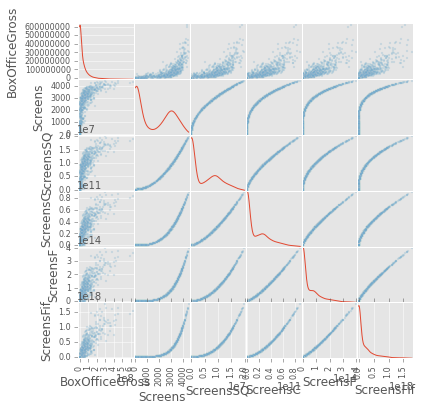

In [2460]:
df = analysisdata[['BoxOfficeGross','Screens','ScreensSQ', 'ScreensC', 'ScreensF', 'ScreensFif']]
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x149eeeb90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14ced1210>]], dtype=object)

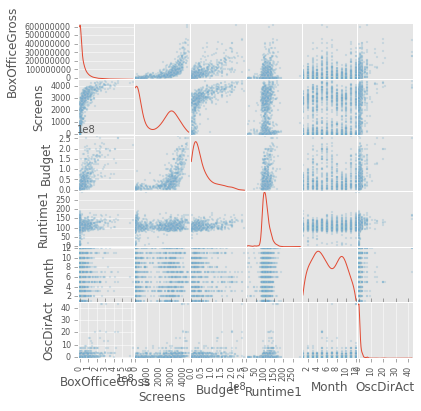

In [2694]:
df = analysisdata[['BoxOfficeGross','Screens','Budget', 'Runtime1', 'Month', 'OscDirAct']]
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13f03d0d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13b873650>]], dtype=object)

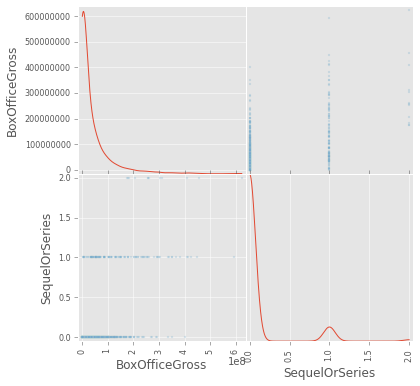

In [2462]:
df = analysisdata[['BoxOfficeGross','SequelOrSeries']]
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

Run some analyses on the relationship between Genre, Brand, Series, and Studio

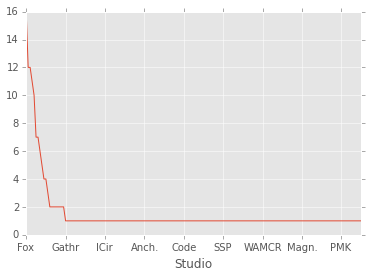

In [2464]:
df = analysisdata.groupby(['Studio'])['Series0'].apply(lambda x: len(x.unique()))
df.sort(ascending = False)
df.plot()

In [2465]:
df = analysisdata.groupby(['Brand0','Studio', 'Series0'])['Counts'].sum()

In [2466]:
import math
z = []
for i in range(len(analysisdata['BoxOfficeGross'])):
    x = analysisdata['BoxOfficeGross'][i]
    y = analysisdata['Screens'][i]
    n = float(x/y**3)
    if math.isnan(n) == False:
        z.append(n)
print np.std(z)

3363.69534544


In [2467]:
moviedata['Genre0'].unique()

array([u'Comedy', u'Documentary', u'Action', u'Horror', u'Drama', u'Crime',
       'N/A', u'Musical', u'Adventure', u'Biography', u'Thriller',
       u'Sci-Fi', u'Animation', u'Mystery', u'Talk-Show', u'Short',
       u'Romance', u'Music', u'Fantasy', u'Family', u'News', u'Western',
       u'History', u'Reality-TV'], dtype=object)

In [2482]:
df = analysisdata.groupby(['Genre0Brand'])['Counts'].sum()
df.sort(ascending=False)
df[:50]

Genre0Brand
Comedy-None                                348
Drama-None                                 281
Action-None                                252
Documentary-None                           111
Biography-None                              63
N/A-None                                    58
Horror-None                                 56
Crime-None                                  56
Adventure-None                              56
Animation-None                              48
Action-Marvel Comics                        15
Action-Legendary Pictures                   14
Animation-DreamWorks Animation              13
Short-None                                  13
Thriller-None                                6
Drama-Nicholas Sparks                        6
Mystery-None                                 6
Music-None                                   5
Animation-Pixar                              5
Comedy-Tyler Perry                           5
Animation-Illumination Entertainment         5
A

In [2515]:
df = analysisdata.groupby(['Series0'])['Counts'].sum()
df.sort(ascending=False)
df[:50]

Series0
None                        1390
Paranormal Activity            4
The Hobbit                     3
Insidious                      3
Step Up                        3
Despicable Me                  3
Atlas Shrugged Franchise       3
Diary of a Wimpy Kid           3
The Expendables                3
The Fast and the Furious       3
X-Men                          3
The Hunger Games               3
Madea                          3
Twilight                       3
Spider-Man                     2
Divergent                      2
Madagascar                     2
Planet of the Apes             2
Harry Potter                   2
Resident Evil                  2
How to Train Your Dragon       2
Captain America                2
Jackass                        2
Shrek                          2
Iron Man                       2
Transformers                   2
Taken                          2
Avengers                       2
Thor                           2
The Hangover                   2
Th

In [2761]:
df = analysisdata[analysisdata['OscDirAct'] > 0]['OscDirAct']
df = df.sort(ascending=False, inplace=False)
df[:30]

The Hobbit: The Desolation of Smaug            12
The Hobbit: An Unexpected Journey              12
The Hobbit: The Battle of the Five Armies      12
The Bourne Legacy                               7
Pirates of the Caribbean: On Stranger Tides     7
Prometheus                                      7
The Dark Knight Rises                           6
American Hustle                                 5
Les Miserables (2012)                           4
The Monuments Men                               4
X-Men: Days of Future Past                      4
Iron Man 3                                      4
Avengers: Age of Ultron                         4
Iron Man 2                                      4
The Girl Who Played with Fire                   4
Thor                                            4
The Grand Budapest Hotel                        4
Man of Steel                                    3
The Ides of March                               3
The Hunger Games: Mockingjay - Part 1           3


In [2605]:
df = analysisdata.groupby(['OscDirAct'])['Counts'].sum()
df.sort(ascending=False)
df

OscDirAct
0     1000
1      311
3       74
2       72
5       29
7       14
11       4
9        4
8        4
4        4
17       3
13       1
Name: Counts, dtype: int64

###Preliminary Regression Analyses

In [797]:
from patsy import dmatrices
from sklearn import cross_validation, linear_model
from sklearn import metrics
import statsmodels.api as sm

In [2561]:
actors = analysisdata.columns[23:114]
directors = analysisdata.columns[115:155]

In [2562]:
analysisdata[actors] = analysisdata[actors].fillna(0)
analysisdata[actors] = analysisdata[actors].astype(float)
analysisdata[directors] = analysisdata[directors].fillna(0)
analysisdata[directors] = analysisdata[directors].astype(float)

In [2563]:
analysisdata['OscarNomCast'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.])

In [2566]:
x = analysisdata[actors].sum()
x.sort(ascending = False)
#x.index
a = x.index[:40]
actors1 = '") + Q("'.join(a)
actors1

u'A:Morgan Freeman") + Q("A:Richard Jenkins") + Q("A:Bradley Cooper") + Q("A:Viola Davis") + Q("A:James Franco") + Q("A:Tom Wilkinson") + Q("A:Steve Carell") + Q("A:Johnny Depp") + Q("A:Forest Whitaker") + Q("A:Hugh Jackman") + Q("A:Anne Hathaway") + Q("A:Jude Law") + Q("A:Jamie Foxx") + Q("A:Jessica Chastain") + Q("A:Jennifer Lawrence") + Q("A:Naomi Watts") + Q("A:Julianne Moore") + Q("A:Gary Oldman") + Q("A:Melissa Leo") + Q("A:Jeremy Renner") + Q("A:Cate Blanchett") + Q("A:Helen Mirren") + Q("A:Benedict Cumberbatch") + Q("A:Ben Kingsley") + Q("A:Russell Crowe") + Q("A:Brad Pitt") + Q("A:Philip Seymour Hoffman") + Q("A:Amy Adams") + Q("A:Terrence Howard") + Q("A:Reese Witherspoon") + Q("A:Judi Dench") + Q("A:Rooney Mara") + Q("A:Jesse Eisenberg") + Q("A:Leonardo DiCaprio") + Q("A:Matthew McConaughey") + Q("A:Bill Murray") + Q("A:George Clooney") + Q("A:Halle Berry") + Q("A:Denzel Washington") + Q("A:Kate Winslet'

In [844]:
x = analysisdata[directors].sum()
x.sort(ascending = False)
a = x.index[:15]
directors1 = '") + Q("'.join(a)
directors1

u'D:Steven Spielberg") + Q("D:Clint Eastwood") + Q("D:David Fincher") + Q("D:Martin Scorsese") + Q("D:Ridley Scott") + Q("D:Woody Allen") + Q("D:Peter Jackson") + Q("D:Tom Hooper") + Q("D:Danny Boyle") + Q("D:David O. Russell") + Q("D:Jason Reitman") + Q("D:Richard Linklater") + Q("D:Darren Aronofsky") + Q("D:George Clooney") + Q("D:Wes Anderson'

In [1894]:
#Model Option 1: Be really specific about both series and actors/directors
#y, X = dmatrices('BoxOfficeGross ~ Month2 + Series0 + GenreBrand + ScreensC + Q("A:Morgan Freeman") + Q("A:Richard Jenkins") + Q("A:Bradley Cooper") + Q("A:Viola Davis") + Q("A:James Franco") + Q("A:Tom Wilkinson") + Q("A:Steve Carell") + Q("A:Johnny Depp") + Q("A:Forest Whitaker") + Q("A:Hugh Jackman") + Q("A:Anne Hathaway") + Q("A:Jude Law") + Q("A:Jamie Foxx") + Q("A:Jessica Chastain") + Q("A:Jennifer Lawrence") + Q("A:Naomi Watts") + Q("A:Julianne Moore") + Q("A:Gary Oldman") + Q("A:Melissa Leo") + Q("A:Jeremy Renner") + Q("A:Cate Blanchett") + Q("A:Helen Mirren") + Q("A:Benedict Cumberbatch") + Q("A:Ben Kingsley") + Q("A:Russell Crowe") + Q("A:Brad Pitt") + Q("A:Philip Seymour Hoffman") + Q("D:Steven Spielberg") + Q("D:Clint Eastwood") + Q("D:David Fincher") + Q("D:Martin Scorsese") + Q("D:Ridley Scott") + Q("D:Woody Allen") + Q("D:Peter Jackson") + Q("D:Tom Hooper") + Q("D:Danny Boyle") + Q("D:David O. Russell") + Q("D:Jason Reitman") + Q("D:Richard Linklater") + Q("D:Darren Aronofsky") + Q("D:George Clooney") + Q("D:Wes Anderson")', data=analysisdata, return_type='dataframe')

In [2845]:
#Model Option 2: Be not very specific about series and actors/directors
y, X = dmatrices('BoxOfficeGross ~ Month2 + Studio + Genre0Brand + Screens + ScreensSQ + ScreensC + ScreensF + OscDirAct', data=analysisdata, return_type='dataframe')

In [2846]:
#Model Option 3: Just Screens
#y, X = dmatrices('BoxOfficeGross ~ ScreensC', data=analysisdata, return_type='dataframe')

In [2847]:
#Model Option 4: Without screens
#y, X = dmatrices('BoxOfficeGross ~ Season + GenreBrand + SequelOrSeries + OscarNomCast + OscarNomDir', data=analysisdata, return_type='dataframe')

In [2848]:
#Model Option 5: Be really specific about both series and actors/directors
#y, X = dmatrices('BoxOfficeGross ~ Month2 + Series0 + GenreBrand + Q("A:Morgan Freeman") + Q("A:Richard Jenkins") + Q("A:Bradley Cooper") + Q("A:Viola Davis") + Q("A:James Franco") + Q("A:Tom Wilkinson") + Q("A:Steve Carell") + Q("A:Johnny Depp") + Q("A:Forest Whitaker") + Q("A:Hugh Jackman") + Q("A:Anne Hathaway") + Q("A:Jude Law") + Q("A:Jamie Foxx") + Q("A:Jessica Chastain") + Q("A:Jennifer Lawrence") + Q("A:Naomi Watts") + Q("A:Julianne Moore") + Q("A:Gary Oldman") + Q("A:Melissa Leo") + Q("A:Jeremy Renner") + Q("A:Cate Blanchett") + Q("A:Helen Mirren") + Q("A:Benedict Cumberbatch") + Q("A:Ben Kingsley") + Q("A:Russell Crowe") + Q("A:Brad Pitt") + Q("A:Philip Seymour Hoffman") + Q("D:Steven Spielberg") + Q("D:Clint Eastwood") + Q("D:David Fincher") + Q("D:Martin Scorsese") + Q("D:Ridley Scott") + Q("D:Woody Allen") + Q("D:Peter Jackson") + Q("D:Tom Hooper") + Q("D:Danny Boyle") + Q("D:David O. Russell") + Q("D:Jason Reitman") + Q("D:Richard Linklater") + Q("D:Darren Aronofsky") + Q("D:George Clooney") + Q("D:Wes Anderson")', data=analysisdata, return_type='dataframe')

####Splitting Data into Training and Testing Set

In [2849]:
from sklearn.cross_validation import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
print X.shape, y.shape

(1213, 258) (1213, 1)


#####Iteration 1

In [2850]:
X1, y1 = X, y
model1 = sm.OLS(y1, X1)
results = model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         BoxOfficeGross   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1669.
Date:                Thu, 16 Jul 2015   Prob (F-statistic):               0.00
Time:                        23:27:59   Log-Likelihood:                -22598.
No. Observations:                1213   AIC:                         4.520e+04
Df Residuals:                    1209   BIC:                         4.523e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                               9.062e+05   2.74e+06      0.331      0.741     -4.47e+06  6.28e+06
Month2[T.Aug]                                          -5.838e+06   3.05e+06     -1.914      0.056     -1.18e+07  1.47e+05
Month2[T.Dec]                                           8.445e+06   3.37e+06      2.508      0.012      1.84e+06  1.51e+07
Month2[T.Feb]                                           1.035e+06   3.24e+06      0.319      0.749     -5.32e+06  7.39e+06
Month2[T.Jan]                                          -3.511e+06   3.39e+06     -1.037      0.300     -1.02e+07  3.13e+06
Month2[T.Jul]                                          -4.969e+06   3.46e+06     -1.435      0.152     -1.18e+07  1.82e+06
Month2[T.Jun]                                           6.986e+06   3.08e+06      2.268      0.023      9.44e+05   1.3e+07
Month2[T.Mar]                                           3.953e+04   3.09e+06      0.013      0.990     -6.01e+06  6.09e+06
Month2[T.May]                                          -1.768e+06   3.12e+06     -0.567      0.571     -7.89e+06  4.35e+06
Month2[T.Nov]                                           7.893e+06    3.7e+06      2.134      0.033      6.35e+05  1.52e+07
Month2[T.Oct]                                          -8.919e+05   3.17e+06     -0.281      0.779     -7.12e+06  5.33e+06
Month2[T.Sept]                                         -6.089e+06   3.06e+06     -1.989      0.047     -1.21e+07 -8.42e+04
Studio[T.7-57]                                         -2.194e+05   2.42e+05     -0.906      0.365     -6.94e+05  2.56e+05
Studio[T.A24]                                          -1.183e+05   4.66e+05     -0.254      0.800     -1.03e+06  7.97e+05
Studio[T.AD]                                            7.351e+05   7.78e+05      0.945      0.345     -7.92e+05  2.26e+06
Studio[T.ADC]                                           -1.75e+05   4.39e+05     -0.398      0.690     -1.04e+06  6.87e+05
Studio[T.ALP]                                           1.202e+05   3.91e+05      0.307      0.759     -6.47e+05  8.88e+05
Studio[T.APD/C]                                        -6.312e+04   1.32e+05     -0.479      0.632     -3.22e+05  1.95e+05
Studio[T.ATO]                                           2.465e+05   1.57e+05      1.566      0.118     -6.24e+04  5.55e+05
Studio[T.AaF]                                          -1.508e+05   2.92e+05     -0.516      0.606     -7.24e+05  4.23e+05
Studio[T.Abr.]                                         -2.251e+04   5.31e+05     -0.042      0.966     -1.06e+06  1.02e+06
Studio[T.Alc]                                          -4.056e+04   3.68e+05     -0.110      0.912     -7.63e+05  6.82e+05
Studio[T

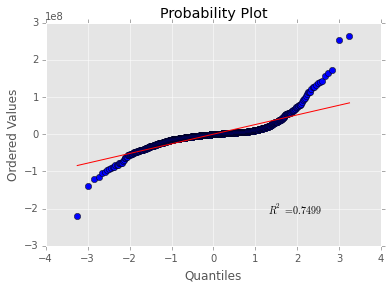

In [2851]:
import pylab 
import scipy.stats as stats
resid = results.resid
stats.probplot(resid, dist="norm", plot=pylab)
pylab.show()

In [2852]:
print X1.shape, y1.shape

(1213, 258) (1213, 1)


In [2853]:
X_digits = np.array(X1)
Y_digits = np.array(y1)

n_samples = X1.shape[0]

cv = cross_validation.ShuffleSplit(n_samples, n_iter=100, test_size=0.3, random_state=1)
regr = linear_model.LinearRegression()

scores = cross_validation.cross_val_score(regr, X_digits, Y_digits, scoring='r2', cv=cv)
#print scores
print scores.mean()
print scores.std()

0.734683272588
0.0533964094868


#####Iteration 2

In [2854]:
pvalues = results.pvalues
columns = pvalues.index[pvalues < 0.05]
X2 = X1.loc[:,columns]
X2['Intercept'] = 1

In [2855]:
print X2.shape, y1.shape

(1213, 39) (1213, 1)


In [2856]:
model2 = sm.OLS(y1, X2)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         BoxOfficeGross   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1635.
Date:                Thu, 16 Jul 2015   Prob (F-statistic):               0.00
Time:                        23:28:08   Log-Likelihood:                -22609.
No. Observations:                1213   AIC:                         4.523e+04
Df Residuals:                    1209   BIC:                         4.525e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------------------
Month2[T.Dec]                                           1.122e+07   3.61e+06      3.104      0.002      4.13e+06  1.83e+07
Month2[T.Jun]                                           9.875e+06   3.13e+06      3.151      0.002      3.73e+06   1.6e+07
Month2[T.Nov]                                           1.047e+07   3.54e+06      2.961      0.003      3.53e+06  1.74e+07
Month2[T.Sept]                                         -2.912e+06   3.01e+06     -0.967      0.334     -8.82e+06     3e+06
Studio[T.Aren]                                         -3.844e+04   2.07e+04     -1.857      0.064      -7.9e+04  2172.868
Studio[T.BV]                                            1.659e+07    4.4e+06      3.775      0.000      7.97e+06  2.52e+07
Studio[T.Fox]                                          -1.055e+07   4.13e+06     -2.557      0.011     -1.86e+07 -2.45e+06
Studio[T.GK]                                            7.711e+04    9.6e+06      0.008      0.994     -1.88e+07  1.89e+07
Studio[T.GMF]                                          -5.944e+04   3.37e+04     -1.762      0.078     -1.26e+05  6754.612
Studio[T.Gold.]                                          1.08e+05   3.48e+05      0.310      0.756     -5.74e+05   7.9e+05
Studio[T.JS]                                           -3.387e+04   2.14e+04     -1.584      0.114     -7.58e+04  8087.070
Studio[T.KE]                                            1.441e+05   5.45e+04      2.642      0.008      3.71e+04  2.51e+05
Studio[T.KL]                                           -1.051e+05   7.93e+04     -1.325      0.186     -2.61e+05  5.06e+04
Studio[T.MFG]                                          -3.385e+04   2.14e+04     -1.582      0.114     -7.58e+04  8117.347
Studio[T.P/DW]                                         -2.134e+07   5.67e+06     -3.760      0.000     -3.25e+07 -1.02e+07
Studio[T.P4]                                           -1.051e+05   7.93e+04     -1.324      0.186     -2.61e+05  5.06e+04
Studio[T.PH]                                           -6.044e+04   3.37e+04     -1.792      0.073     -1.27e+05  5742.547
Studio[T.Purd.]                                        -7.771e+04   4.57e+04     -1.701      0.089     -1.67e+05  1.19e+04
Studio[T.S/IMA]                                        -6.436e+04   3.56e+04     -1.807      0.071     -1.34e+05  5520.504
Studio[T.SGem]                                          1.648e+07   7.31e+06      2.255      0.024      2.14e+06  3.08e+07
Studio[T.TriS]                                          1.808e+07   9.25e+06      1.954      0.051     -7.03e+04  3.62e+07
Studio[T.Uni.]                                          1.416e+07   3.94e+06      3.591      0.000      6.42e+06  2.19e+07
Genre0Br

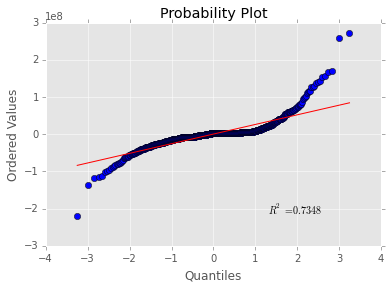

In [2857]:
resid = results.resid
stats.probplot(resid, dist="norm", plot=pylab)
pylab.show()

In [2858]:
resid.sort(ascending = False)
print resid[:20]

Jurassic World                     2.729195e+08
Marvel's The Avengers              2.582155e+08
Skyfall                            1.702742e+08
Alice in Wonderland (2010)         1.673522e+08
American Sniper                    1.566686e+08
The Hunger Games                   1.550835e+08
The Hunger Games: Catching Fire    1.417919e+08
Despicable Me 2                    1.395482e+08
Transformers: Dark of the Moon     1.372805e+08
Furious 7                          1.297264e+08
Ted                                1.273564e+08
Inception                          1.260589e+08
The Hangover Part II               1.169419e+08
Bridesmaids                        1.158064e+08
Gravity                            1.124265e+08
Despicable Me                      1.110630e+08
Avengers: Age of Ultron            1.020111e+08
22 Jump Street                     9.975731e+07
Lincoln                            9.810866e+07
The Heat                           9.354863e+07
dtype: float64


In [2859]:
X_digits = np.array(X2)
Y_digits = np.array(y1)

n_samples = X2.shape[0]

cv = cross_validation.ShuffleSplit(n_samples, n_iter=100, test_size=0.3, random_state=3)
regr = linear_model.LinearRegression()

scores = cross_validation.cross_val_score(regr, X_digits, Y_digits, scoring='r2', cv=cv)
#print scores
print scores.mean()
print scores.std()

0.763036808274
0.0414367327095


#####Iteration 3

In [2860]:
pvalues = results.pvalues
columns = pvalues.index[pvalues < 0.05]
X3 = X2.loc[:,columns]
X3['Intercept'] = 1

In [2861]:
print X3.shape, y1.shape

(1213, 23) (1213, 1)


In [2862]:
model3 = sm.OLS(y1, X3)
results = model3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         BoxOfficeGross   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1220.
Date:                Thu, 16 Jul 2015   Prob (F-statistic):               0.00
Time:                        23:28:09   Log-Likelihood:                -22611.
No. Observations:                1213   AIC:                         4.523e+04
Df Residuals:                    1208   BIC:                         4.526e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------------------
Month2[T.Dec]                                           1.138e+07    3.6e+06      3.158      0.002      4.31e+06  1.85e+07
Month2[T.Jun]                                           1.001e+07   3.12e+06      3.208      0.001      3.89e+06  1.61e+07
Month2[T.Nov]                                           1.058e+07   3.52e+06      3.001      0.003      3.66e+06  1.75e+07
Studio[T.BV]                                            1.633e+07    4.4e+06      3.710      0.000      7.69e+06   2.5e+07
Studio[T.Fox]                                          -1.088e+07   4.13e+06     -2.636      0.008      -1.9e+07 -2.78e+06
Studio[T.KE]                                            1.252e+05   4.38e+04      2.856      0.004      3.92e+04  2.11e+05
Studio[T.P/DW]                                         -2.124e+07   5.69e+06     -3.735      0.000     -3.24e+07 -1.01e+07
Studio[T.SGem]                                          1.565e+07   7.31e+06      2.142      0.032      1.31e+06     3e+07
Studio[T.Uni.]                                          1.384e+07   3.94e+06      3.512      0.000      6.11e+06  2.16e+07
Genre0Brand[T.Action-Marvel Comics]                     7.705e+06   2.02e+06      3.817      0.000      3.74e+06  1.17e+07
Genre0Brand[T.Adventure-Tim Burton-Johnny Depp]         2.358e+05   8.42e+04      2.800      0.005      7.06e+04  4.01e+05
Genre0Brand[T.Animation-DreamWorks Animation]          -2.133e+07   5.61e+06     -3.803      0.000     -3.23e+07 -1.03e+07
Genre0Brand[T.Animation-Illumination Entertainment]     1.365e+06   3.06e+05      4.455      0.000      7.64e+05  1.97e+06
Genre0Brand[T.Animation-Marvel Comics]                  5.005e+05   8.55e+04      5.856      0.000      3.33e+05  6.68e+05
Genre0Brand[T.Animation-Pixar]                          1.331e+06   2.08e+05      6.399      0.000      9.23e+05  1.74e+06
Genre0Brand[T.Animation-Walt Disney Animation Studios]  1.114e+06   2.59e+05      4.306      0.000      6.07e+05  1.62e+06
Genre0Brand[T.Biography-Legendary Pictures]             3.699e+05   7.25e+04      5.100      0.000      2.28e+05  5.12e+05
Genre0Brand[T.Drama-Stephen King]                       8.882e+05   4.34e+05      2.047      0.041       3.7e+04  1.74e+06
ScreensSQ                                                 26.7799      3.768      7.106      0.000        19.387    34.173
ScreensC                                                  -0.0183      0.002     -8.235      0.000        -0.023    -0.014
ScreensF                                                 3.68e-06   3.29e-07     11.172      0.000      3.03e-06  4.33e-06
OscDirAct                                               5.441e+06   6.53e+05      8.330      0.000      4.16e+06  6.72e+06
Intercep

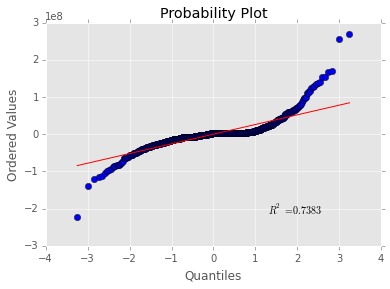

In [2863]:
resid = results.resid
stats.probplot(resid, dist="norm", plot=pylab)
pylab.show()

In [2864]:
X_digits = np.array(X3)
Y_digits = np.array(y1)

n_samples = X3.shape[0]

cv = cross_validation.ShuffleSplit(n_samples, n_iter=100, test_size=0.3, random_state=1)
regr = linear_model.LinearRegression()

scores = cross_validation.cross_val_score(regr, X_digits, Y_digits, cv=cv)
#print scores
print scores.mean()
print scores.std()

0.760949565946
0.0486816380381


#####Iteration 4

In [2865]:
pvalues = results.pvalues
columns = pvalues.index[pvalues < 0.05]
X4 = X3.loc[:,columns]
X4['Intercept'] = 1

In [2866]:
print X4.shape, y1.shape

(1213, 23) (1213, 1)


In [2884]:
print X4.columns

Index([u'Month2[T.Dec]', u'Month2[T.Jun]', u'Month2[T.Nov]', u'Studio[T.BV]',
       u'Studio[T.Fox]', u'Studio[T.KE]', u'Studio[T.P/DW]', u'Studio[T.SGem]',
       u'Studio[T.Uni.]', u'Genre0Brand[T.Action-Marvel Comics]',
       u'Genre0Brand[T.Adventure-Tim Burton-Johnny Depp]',
       u'Genre0Brand[T.Animation-DreamWorks Animation]',
       u'Genre0Brand[T.Animation-Illumination Entertainment]',
       u'Genre0Brand[T.Animation-Marvel Comics]',
       u'Genre0Brand[T.Animation-Pixar]',
       u'Genre0Brand[T.Animation-Walt Disney Animation Studios]',
       u'Genre0Brand[T.Biography-Legendary Pictures]',
       u'Genre0Brand[T.Drama-Stephen King]', u'ScreensSQ', u'ScreensC',
       u'ScreensF', u'OscDirAct', u'Intercept'],
      dtype='object')


In [2868]:
model4 = sm.OLS(y1, X4)
results = model4.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         BoxOfficeGross   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1220.
Date:                Thu, 16 Jul 2015   Prob (F-statistic):               0.00
Time:                        23:28:09   Log-Likelihood:                -22611.
No. Observations:                1213   AIC:                         4.523e+04
Df Residuals:                    1208   BIC:                         4.526e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------------------
Month2[T.Dec]                                           1.138e+07    3.6e+06      3.158      0.002      4.31e+06  1.85e+07
Month2[T.Jun]                                           1.001e+07   3.12e+06      3.208      0.001      3.89e+06  1.61e+07
Month2[T.Nov]                                           1.058e+07   3.52e+06      3.001      0.003      3.66e+06  1.75e+07
Studio[T.BV]                                            1.633e+07    4.4e+06      3.710      0.000      7.69e+06   2.5e+07
Studio[T.Fox]                                          -1.088e+07   4.13e+06     -2.636      0.008      -1.9e+07 -2.78e+06
Studio[T.KE]                                            1.252e+05   4.38e+04      2.856      0.004      3.92e+04  2.11e+05
Studio[T.P/DW]                                         -2.124e+07   5.69e+06     -3.735      0.000     -3.24e+07 -1.01e+07
Studio[T.SGem]                                          1.565e+07   7.31e+06      2.142      0.032      1.31e+06     3e+07
Studio[T.Uni.]                                          1.384e+07   3.94e+06      3.512      0.000      6.11e+06  2.16e+07
Genre0Brand[T.Action-Marvel Comics]                     7.705e+06   2.02e+06      3.817      0.000      3.74e+06  1.17e+07
Genre0Brand[T.Adventure-Tim Burton-Johnny Depp]         2.358e+05   8.42e+04      2.800      0.005      7.06e+04  4.01e+05
Genre0Brand[T.Animation-DreamWorks Animation]          -2.133e+07   5.61e+06     -3.803      0.000     -3.23e+07 -1.03e+07
Genre0Brand[T.Animation-Illumination Entertainment]     1.365e+06   3.06e+05      4.455      0.000      7.64e+05  1.97e+06
Genre0Brand[T.Animation-Marvel Comics]                  5.005e+05   8.55e+04      5.856      0.000      3.33e+05  6.68e+05
Genre0Brand[T.Animation-Pixar]                          1.331e+06   2.08e+05      6.399      0.000      9.23e+05  1.74e+06
Genre0Brand[T.Animation-Walt Disney Animation Studios]  1.114e+06   2.59e+05      4.306      0.000      6.07e+05  1.62e+06
Genre0Brand[T.Biography-Legendary Pictures]             3.699e+05   7.25e+04      5.100      0.000      2.28e+05  5.12e+05
Genre0Brand[T.Drama-Stephen King]                       8.882e+05   4.34e+05      2.047      0.041       3.7e+04  1.74e+06
ScreensSQ                                                 26.7799      3.768      7.106      0.000        19.387    34.173
ScreensC                                                  -0.0183      0.002     -8.235      0.000        -0.023    -0.014
ScreensF                                                 3.68e-06   3.29e-07     11.172      0.000      3.03e-06  4.33e-06
OscDirAct                                               5.441e+06   6.53e+05      8.330      0.000      4.16e+06  6.72e+06
Intercep

In [2869]:
X_digits = np.array(X4)
Y_digits = np.array(y1)

n_samples = X4.shape[0]

cv = cross_validation.ShuffleSplit(n_samples, n_iter=100, test_size=0.3, random_state=3)
regr = linear_model.LinearRegression()

scores = cross_validation.cross_val_score(regr, X_digits, Y_digits, cv=cv)
#print scores
print scores.mean()
print scores.std()

0.763808759971
0.0417554604226


###Running model on test set

In [2870]:
X_testF = X_test[X3.columns]
#X_testF = X_test[X3.columns]

In [2871]:
print y1.shape, X1.shape, y_test.shape, X_testF.shape

(1213, 1) (1213, 258) (304, 1) (304, 23)


In [2872]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression().fit(X3, y1)

In [2873]:
model3.score(X_testF, y_test)

0.81239012682939082

In [2874]:
model2 = LinearRegression().fit(X2, y1)

In [2875]:
X_testF = X_test[X2.columns]
model2.score(X_testF, y_test)

0.8124629654200507

In [2876]:
model1 = LinearRegression().fit(X1, y1)

In [2877]:
X_testF = X_test[X1.columns]
model1.score(X_testF, y_test)

0.80716523883042612

In [2878]:
model4 = LinearRegression().fit(X4, y1)

In [2879]:
X_testF = X_test[X4.columns]
model4.score(X_testF, y_test)

0.81239012682939082

In [2880]:
predictions = pd.DataFrame(zip(model3.predict(X_testF), X_testF.index))
predictions.columns = ['BoxOfficeGross', 'Movie']
predictions['BoxOfficeGross'] = predictions['BoxOfficeGross'].apply(lambda x: x[0].astype(int))
predictions.index = predictions['Movie']
predictions = predictions.BoxOfficeGross
predictions = predictions.sort(ascending = False, inplace=False)
predictions[:20]

Movie
Iron Man 3                               350239236
The Hunger Games: Mockingjay - Part 1    288084957
Transformers: Age of Extinction          284279127
The Hobbit: The Desolation of Smaug      279011620
X-Men: Days of Future Past               256284096
Cars 2                                   250279449
How to Train Your Dragon 2               242173126
Toy Story 3                              234949467
Captain America: The Winter Soldier      220828951
Monsters University                      217472118
The Wolverine                            203745603
Dawn of the Planet of the Apes           194627757
The Lone Ranger                          191487970
Frozen                                   187929996
Rango                                    180573402
Cinderella (2015)                        172776721
Dr. Seuss' The Lorax                     159133559
The Croods                               148593699
Clash of the Titans (2010)               146827871
Prometheus               

(array([ 144.,   37.,   33.,   32.,   18.,   10.,    6.,    3.,    4.,
           2.,    2.,    3.,    2.,    2.,    2.,    1.,    2.,    0.,
           0.,    1.]),
 array([ -4.67221500e+06,   1.30733576e+07,   3.08189301e+07,
          4.85645027e+07,   6.63100752e+07,   8.40556478e+07,
          1.01801220e+08,   1.19546793e+08,   1.37292365e+08,
          1.55037938e+08,   1.72783510e+08,   1.90529083e+08,
          2.08274656e+08,   2.26020228e+08,   2.43765801e+08,
          2.61511373e+08,   2.79256946e+08,   2.97002518e+08,
          3.14748091e+08,   3.32493663e+08,   3.50239236e+08]),
 <a list of 20 Patch objects>)

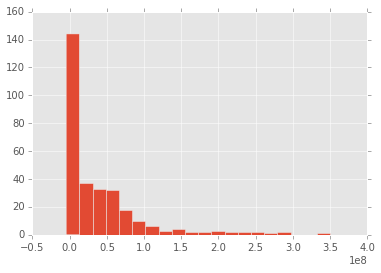

In [2881]:
plt.hist(predictions, bins=20)

In [2882]:
actuals = y_test
actuals.sort(columns='BoxOfficeGross', axis=0, ascending=False, inplace=True)
actuals[:20]

,BoxOfficeGross
Toy Story 3,415004880
Iron Man 3,409013994
Frozen,400738009
The Hunger Games: Mockingjay - Part 1,337135885
Monsters University,268492764
Captain America: The Winter Soldier,259766572
The Hobbit: The Desolation of Smaug,258366855
Transformers: Age of Extinction,245439076
X-Men: Days of Future Past,233921534
Dr. Seuss' The Lorax,214030500
